In [18]:
%matplotlib inline

In [19]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy import stats

In [20]:
data1 = pd.read_csv('Project-1/output_data/county_metrics')
data2 = pd.read_csv('Project-1/output_data/UShospitals.csv')
data3 = pd.read_csv('Project-1/output_data/political.csv')
data4 =pd.read_csv('Project-1/Data Analysis/Resources/countycenter.csv')
covid_data = pd.DataFrame(data1)
hospitals =pd.DataFrame(data2)
politics = pd.DataFrame(data3)
population = pd.DataFrame(data4)

In [21]:
covid_data=covid_data.rename(columns={'ID':'fips'})
del covid_data['Unnamed: 0']
covid_data.head()

,State,County,Ynot,First Doubling,Current Total,Inv Tau,Tau,R Squared,Days In,int,fips
0,Iowa,Louisa,1,1,166,0.406604,2.459397,0.918426,13,0.893476,19115.0
1,West Virginia,Wayne,17,2,72,0.398447,2.509745,0.984550,7,-0.909430,54099.0
2,Nebraska,Custer,3,2,19,0.388685,2.572778,0.961513,10,-0.877577,31041.0
3,Kentucky,Jackson,5,3,37,0.353461,2.829168,0.980164,8,-0.695824,21109.0
4,Kentucky,Adair,9,4,46,0.340736,2.934821,0.977411,11,-1.320765,21001.0


In [22]:
del hospitals['Unnamed: 0']
del hospitals['County']
del hospitals['State']
hospitals.head()

,Average Rating,Hospitals,Emergency Services,County Beds,fips
0,2.902778,90.0,0.583333,15072.0,6037
1,3.100000,28.0,0.900000,3054.0,6059
2,2.400000,22.0,0.933333,3230.0,6071
3,4.000000,21.0,0.933333,4205.0,6073
4,2.437500,17.0,0.937500,987.0,6065


In [23]:
del politics['FIPS.1']
politics =politics.rename(columns={'FIPS':'fips'})
politics.head()

,fips,Year,R/D Spectrum
0,1001.0,2008,0.471645
1,1003.0,2008,0.531744
2,1005.0,2008,0.025785
3,1007.0,2008,0.428398
4,1009.0,2008,0.659665


In [24]:
df=pd.merge(covid_data,hospitals,on ='fips',how='left')
df = pd.merge(df,politics,on='fips',how='left')

In [25]:
df2 = df.loc[(df['R Squared']  >.85)&(df['County']!='Unknown')&(df['Current Total']>20)]
df2=df2.sort_values('Tau', ascending =False)
df2.head(5)

,State,County,Ynot,First Doubling,Current Total,Inv Tau,Tau,R Squared,Days In,int,fips,Average Rating,Hospitals,Emergency Services,County Beds,Year,R/D Spectrum
2116,Colorado,Pitkin,18,13,51,0.055143,18.134529,0.974721,36,-0.682590,8097.0,NaN,1.0,NaN,NaN,2008.0,-0.381513
2059,Nebraska,Douglas,23,23,280,0.064274,15.558402,0.958442,59,-1.316731,31055.0,4.0,11.0,1.0,2232.0,2008.0,0.058429
2030,California,Solano,1,1,161,0.067340,14.849999,0.894082,52,1.545863,6095.0,3.0,6.0,1.0,781.0,2008.0,-0.242935
2001,Mississippi,Lowndes,9,6,30,0.070268,14.231193,0.974608,26,-0.592629,28087.0,3.0,1.0,1.0,328.0,2008.0,0.103935
1967,Oregon,Umatilla,2,3,22,0.073780,13.553784,0.931668,36,-0.586211,41059.0,3.5,2.0,1.0,98.0,2008.0,0.285717


In [26]:
population['fips']=population['STATEFP']*1000+population['COUNTYFP']
population.head()

,STATEFP,COUNTYFP,COUNAME,STNAME,POPULATION,LATITUDE,LONGITUDE,fips
0,1,1,Autauga,Alabama,54571,32.500389,-86.494165,1001
1,1,3,Baldwin,Alabama,182265,30.548923,-87.762381,1003
2,1,5,Barbour,Alabama,27457,31.844036,-85.310038,1005
3,1,7,Bibb,Alabama,22915,33.030921,-87.127659,1007
4,1,9,Blount,Alabama,57322,33.955243,-86.591491,1009


In [27]:
df3= pd.merge(df2,population,on='fips', how = 'left')
del df3['STATEFP']
del df3['COUNTYFP']
del df3['COUNAME']
del df3['STNAME']

df3['Cases per 100k'] = df3['Current Total']/df3['POPULATION']*100000
df3['Beds per 100k'] = df3['County Beds']/df3['POPULATION']*100000
df3['HospxRating'] = df3['Average Rating']*df3['Hospitals']/df3['POPULATION']*100000
df3['Prediction']= df3['Ynot']*np.exp((df3['Days In']-5)*df3['Inv Tau']+df3['int'])
df3['Variation'] =100*(df3['Current Total']-df3['Prediction'])/df3['Current Total']
df3['7 Day Projection']= df3['Ynot']*np.exp((df3['Days In']+7)*df3['Inv Tau']+df3['int'])
US_pop =df3

# .loc[df3['POPULATION']<200000] 
NC_df=df3.loc[df3['State']=='North Carolina']

# *df3['Average Rating']
df3.head()

,State,County,Ynot,First Doubling,Current Total,Inv Tau,Tau,R Squared,Days In,int,...,R/D Spectrum,POPULATION,LATITUDE,LONGITUDE,Cases per 100k,Beds per 100k,HospxRating,Prediction,Variation,7 Day Projection
0,Colorado,Pitkin,18,13,51,0.055143,18.134529,0.974721,36,-0.682590,...,-0.381513,17148.0,39.232543,-106.907765,297.410777,NaN,NaN,50.260905,1.449205,97.411923
1,Nebraska,Douglas,23,23,280,0.064274,15.558402,0.958442,59,-1.316731,...,0.058429,517110.0,41.259910,-96.061471,54.147087,431.629634,8.508828,198.255569,29.194440,428.737312
2,California,Solano,1,1,161,0.067340,14.849999,0.894082,52,1.545863,...,-0.242935,413344.0,38.235582,-122.069324,38.950608,188.946737,4.354726,111.146155,30.965121,249.367304
3,Mississippi,Lowndes,9,6,30,0.070268,14.231193,0.974608,26,-0.592629,...,0.103935,59779.0,33.515351,-88.392697,50.184848,548.687666,5.018485,21.763350,27.455498,50.574400
4,Oregon,Umatilla,2,3,22,0.073780,13.553784,0.931668,36,-0.586211,...,0.285717,75889.0,45.798618,-118.952064,28.989709,129.135975,9.223998,10.958551,50.188406,26.562000


0.8549319051402182
1.4658488014506421e-210


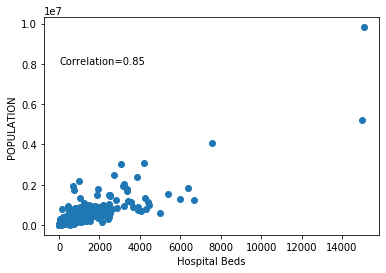

In [32]:
x = 'County Beds'
y = 'POPULATION'
plt.scatter(US_pop[x],US_pop[y])
hold_df = US_pop.dropna(subset=(x,y))
corr=stats.pearsonr(hold_df[x],hold_df[y])
plt.ylabel(y)
plt.xlabel('Hospital Beds')
print(corr[0])
print(corr[1])
plt.annotate(f'Correlation={round(corr[0],2)}',xy=(1,8000000))
plt.savefig('hold')
plt.show()

0.7433556816007729
2.0666448366341303e-05


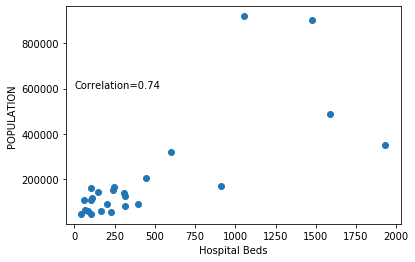

In [36]:
plt.scatter(NC_df[x],NC_df[y])
# plt.ylim(0,20)
hold_df = NC_df.dropna(subset=(x,y))
corr=stats.pearsonr(hold_df[x],hold_df[y])
plt.ylabel(y)
plt.xlabel('Hospital Beds')
print(corr[0])
print(corr[1])
plt.annotate(f'Correlation={round(corr[0],2)}',xy=(1,600000))
plt.savefig('NC_hold')
plt.show()

In [101]:
holdf= NC_df.sort_values('7 Day Prediction', ascending=False)
del holdf['LATITUDE']
del holdf['LONGITUDE']
del holdf['Year']
del holdf['Emergency Services']
del holdf['Inv Tau']
del holdf['fips']
holdf.head()

,State,County,Ynot,First Doubling,Current Total,Tau,R Squared,Days In,int,Average Rating,Hospitals,County Beds,R/D Spectrum,POPULATION,Cases per 100k,BedsperPerson,HospxRating,Prediction,Variation,7 Day Prediction
836,North Carolina,Mecklenburg,4,4,1015,4.928714,0.893284,34,0.165849,3.833333,8.0,1054.0,-0.154193,919628.0,110.370715,114.611560,3.334682,1696.005888,-67.094176,19355.721429
428,North Carolina,Wake,1,5,510,6.302762,0.957810,43,0.461473,4.000000,6.0,1477.0,-0.073770,900993.0,56.604213,163.930241,2.663728,658.902583,-29.196585,4422.687891
977,North Carolina,Granville,3,5,98,4.078884,0.958781,24,-1.181913,3.000000,3.0,NaN,-0.017446,59916.0,163.562321,NaN,15.021029,97.012140,1.008021,1838.705557
683,North Carolina,Cabarrus,2,9,191,5.435115,0.943283,34,-1.003709,2.000000,1.0,NaN,0.251565,178011.0,107.296740,NaN,1.123526,152.187390,20.320738,1384.338482
860,North Carolina,Davidson,2,4,87,4.814532,0.914006,26,-0.360801,3.000000,2.0,243.0,0.402242,162878.0,53.414212,149.191419,3.683739,109.304824,-25.637728,1321.594782


In [ ]:
##NC Stats
bins=[]
step =1
total = int(15/step)
for x in range (total):
    bins.append(x*step)
plt.hist(NC_df['Tau'],bins=bins)
plt.ylabel('# of Counties')
plt.xlabel('Tau')
plt.savefig('output_data/NCTauHist')
plt.show()

In [ ]:
bins=[]
step =1
total = int(15/step)
for x in range (total):
    bins.append(x*step)
plt.hist(NC_df['First Doubling'],bins=bins)
plt.ylabel('# of Counties')
plt.xlabel('Day of first doubling')
plt.savefig('output_data/NCDoubleHist')
plt.show()

In [ ]:
bins=[]
step =5
total = int(200/step)
for x in range (total):
    bins.append(-200+x*step)
for x in range(1,total):
    bins.append(x*step)
plt.hist(NC_df['Variation'],bins=bins)
plt.ylabel('# of Counties')
plt.xlabel('% Difference between model and actual ')
plt.savefig('NCvarHist')
plt.show()

In [ ]:
plt.scatter(NC_df['BedsperPerson'],NC_df['Tau'])
# plt.ylim(0,20)
hold_df = NC_df.dropna(subset=('BedsperPerson','Tau'))
corr=stats.pearsonr(hold_df['BedsperPerson'],hold_df['Tau'])
plt.ylabel('Tau')
plt.xlabel('Beds per 100K people')
plt.annotate(f'Correlation={round(corr[0],2)}',(200,9))
plt.savefig('output_data/NC_bedpervstau')
plt.show()

In [ ]:
plt.scatter(NC_df['Average Rating'],NC_df['Tau'])
# plt.ylim(0,20)
hold_df = NC_df.dropna(subset=('Average Rating','Tau'))
corr=stats.pearsonr(hold_df['Average Rating'],hold_df['Tau'])
plt.ylabel('Tau')
plt.xlabel('Average Hospital Rating')
plt.annotate(f'Correlation={round(corr[0],2)}',(1,10))
plt.savefig('output_data/NC_ratingvstau')
plt.show()

In [ ]:
plt.scatter(NC_df['HospxRating'],NC_df['Tau'])
# plt.ylim(0,20)
hold_df = NC_df.dropna(subset=('HospxRating','Tau'))
corr=stats.pearsonr(hold_df['HospxRating'],hold_df['Tau'])
print(corr[0],corr[1])
plt.show()

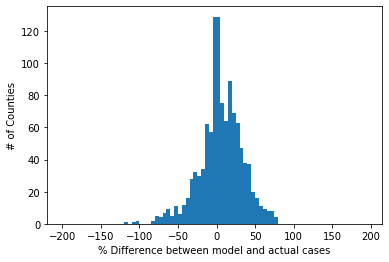

In [70]:
bins=[]
step =5
total = int(200/step)
for x in range (total):
    bins.append(-200+x*step)
for x in range(1,total):
    bins.append(x*step)
plt.hist(US_pop['Variation'],bins=bins)
plt.ylabel('# of Counties')
plt.xlabel('% Difference between model and actual cases')
# plt.annotate(f'Correlation={round(corr[0],2)}',(200,9))
plt.savefig('US_varhist')
plt.show()

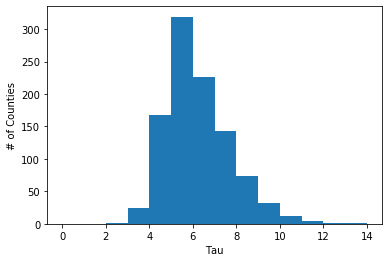

In [73]:
bins=[]
step =1
total = int(15/step)
for x in range (total):
    bins.append(x*step)
plt.hist(US_pop['Tau'],bins=bins)
plt.ylabel('# of Counties')
plt.xlabel('Tau')
# plt.annotate(f'Correlation={round(corr[0],2)}',(200,9))
plt.savefig('US_tauhist')
plt.show()

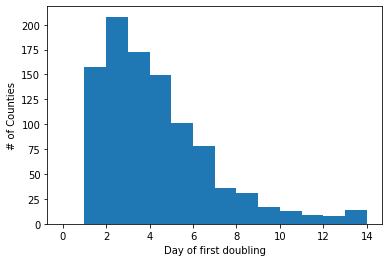

In [74]:
bins=[]
step =1
total = int(15/step)
for x in range (total):
    bins.append(x*step)
plt.hist(US_pop['First Doubling'],bins=bins)
plt.ylabel('# of Counties')
plt.xlabel('Day of first doubling')
# plt.annotate(f'Correlation={round(corr[0],2)}',(200,9))
plt.savefig('US_doublehist_small')
plt.show()

In [ ]:
plt.scatter(US_pop['BedsperPerson'],US_pop['Tau'])
hold_df = US_pop.dropna(subset=('BedsperPerson','Tau'))
corr=stats.pearsonr(hold_df['BedsperPerson'],hold_df['Tau'])
plt.ylabel('Tau')
plt.xlabel('Beds per 100K people')
plt.annotate(f'Correlation={round(corr[0],2)}',(500,13))
plt.savefig('output_data/US_bedpervstau_small')
plt.show()

0.195541609553825
0.0007806279028006121


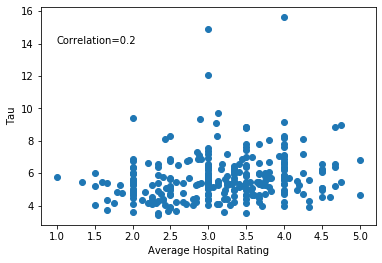

In [16]:
plt.scatter(US_pop['Average Rating'],US_pop['Tau'])
# plt.ylim(0,20)
hold_df = US_pop.dropna(subset=('Average Rating','Tau'))
corr=stats.pearsonr(hold_df['Average Rating'],hold_df['Tau'])
plt.ylabel('Tau')
plt.xlabel('Average Hospital Rating')
print(corr[0])
print(corr[1])
plt.annotate(f'Correlation={round(corr[0],2)}',(1,14))
# plt.savefig('output_data/Us_ratingvstau_small')
plt.show()

In [ ]:
plt.scatter(US_pop['Hospitals'],US_pop['Tau'])
# plt.ylim(0,20)
hold_df = US_pop.dropna(subset=('Hospitals','Tau'))
corr=stats.pearsonr(hold_df['Hospitals'],hold_df['Tau'])
print(corr[0],corr[1])
plt.annotate(f'R$^2$={round(corr[0],2)}',(1,13))
plt.show()

In [ ]:
plt.scatter(US_pop['HospxRating'],US_pop['Tau'])
# plt.ylim(0,20)
hold_df = US_pop.dropna(subset=('HospxRating','Tau'))
corr=stats.pearsonr(hold_df['HospxRating'],hold_df['Tau'])
print(corr[0],corr[1])
plt.show()

In [ ]:
plt.scatter(US_pop['POPULATION'],US_pop['Tau'])
# plt.ylim(4,10)
# plt.xlim(300000,10000000)
hold_df = US_pop.dropna(subset=('POPULATION','Tau'))
corr=stats.pearsonr(hold_df['POPULATION'],hold_df['Tau'])
print(corr[0])
(slope,intercept,x, y, z)=stats.linregress(hold_df['POPULATION'],hold_df['Tau'])
print(slope)
xval = np.arange(0,max(hold_df['POPULATION']),5)
yval=slope*xval+intercept
plt.plot(xval,yval)
plt.show()

In [ ]:
plt.scatter(US_pop['First Doubling'],US_pop['Tau'])
# plt.ylim(4,10)
# plt.xlim(0,10)
hold_df = US_pop.dropna(subset=('First Doubling','Tau'))
corr=stats.pearsonr(hold_df['First Doubling'],hold_df['Tau'])
print(corr[0])
plt.show()

In [ ]:
plt.scatter(df3['POPULATION'],df3['Tau'])
# plt.ylim(4,10)
# plt.xlim(300000,10000000)
hold_df = df3.dropna(subset=('POPULATION','Tau'))
corr=stats.pearsonr(hold_df['POPULATION'],hold_df['Tau'])
print(corr[0])
(slope,intercept,x, y, z)=stats.linregress(hold_df['POPULATION'],hold_df['Tau'])
print(slope)
xval = np.arange(0,max(hold_df['POPULATION']),5)
yval=slope*xval+intercept
plt.plot(xval,yval)
plt.ylabel('Tau')
plt.xlabel('County Population')
plt.annotate(f'Correlation={round(corr[0],2)}',(2000000,14))
plt.savefig('output_data/totpopvstau')
plt.show()

In [ ]:
plt.scatter(df3['County Beds'],df3['Tau'])
# plt.ylim(4,10)
# plt.xlim(300000,10000000)
hold_df = df3.dropna(subset=('County Beds','Tau'))
corr=stats.pearsonr(hold_df['County Beds'],hold_df['Tau'])
print(corr[0])
(slope,intercept,x, y, z)=stats.linregress(hold_df['County Beds'],hold_df['Tau'])
print(slope)
xval = np.arange(0,max(hold_df['County Beds']),5)
yval=slope*xval+intercept
plt.plot(xval,yval)
plt.ylabel('Tau')
plt.xlabel('County Hospital Beds')
plt.annotate(f'Correlation={round(corr[0],2)}',(2000000,14))
plt.savefig('output_data/totcountyvstau')
plt.show()

In [ ]:
plt.scatter(df3['First Doubling'],df3['Tau'])
# plt.ylim(4,10)
# plt.xlim(0,10)
hold_df = df3.dropna(subset=('First Doubling','Tau'))
corr=stats.pearsonr(hold_df['First Doubling'],hold_df['Tau'])
print(corr[0])
plt.show()

In [ ]:
plt.scatter(US_pop['R/D Spectrum'],US_pop['Tau'])
# plt.ylim(4,10)
# plt.xlim(0,500)
hold_df = US_pop.dropna(subset=('R/D Spectrum','Tau'))
corr=stats.pearsonr(hold_df['R/D Spectrum'],hold_df['Tau'])
print(corr[0])
(slope,intercept,x, y, z)=stats.linregress(hold_df['R/D Spectrum'],hold_df['Tau'])
print(slope)
xval = np.arange(min(hold_df['R/D Spectrum']),max(hold_df['R/D Spectrum']),.05)
yval=slope*xval+intercept
plt.plot(xval,yval)
plt.show()

In [ ]:
plt.scatter(NC_df['R/D Spectrum'],NC_df['Tau'])
# plt.ylim(4,10)
# plt.xlim(0,500)
hold_df = NC_df.dropna(subset=('R/D Spectrum','Tau'))
corr=stats.pearsonr(hold_df['R/D Spectrum'],hold_df['Tau'])
print(corr[0])
(slope,intercept,x, y, z)=stats.linregress(hold_df['R/D Spectrum'],hold_df['Tau'])
print(slope)
xval = np.arange(min(hold_df['R/D Spectrum']),max(hold_df['R/D Spectrum']),.05)
yval=slope*xval+intercept
plt.plot(xval,yval)
plt.show()